## Biblioteki oraz dane

In [84]:
import numpy as np
from mnist import MNIST
import matplotlib.pyplot as plt
import math

mnist = MNIST('Dane')
x_train, y_train = mnist.load_training() #60000 próbek
x_test, y_test = mnist.load_testing()    #10000 próbek

In [85]:
x_train = np.asarray(x_train).astype(np.float64)
y_train = np.asarray(y_train).astype(np.int64)
x_test = np.asarray(x_test).astype(np.float64)
y_test = np.asarray(y_test).astype(np.int64)

In [3]:
# x_train = x_train.reshape((x_train.shape[0], 28, 28,))
# x_test = x_test.reshape((x_test.shape[0], 28, 28))
# x_train /= 255
# x_test /= 255

In [86]:
print('Wymiar x_train:', x_train.shape)
print('Wymiar x_test:', x_test.shape)
print('Liczba etykiet y_train:', y_train.shape)
print('Liczba etykiet y_test:', y_test.shape)

Wymiar x_train: (60000, 784)
Wymiar x_test: (10000, 784)
Liczba etykiet y_train: (60000,)
Liczba etykiet y_test: (10000,)


## Wizualizacja

Etykieta: 0


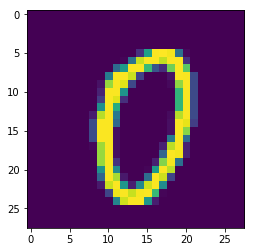

Etykieta: 5


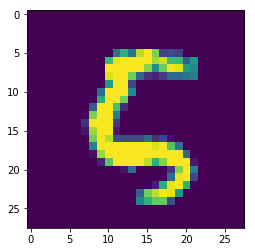

Etykieta: 9


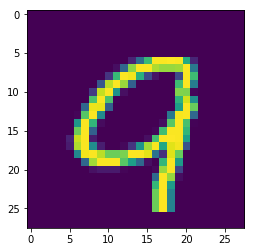

Etykieta: 7


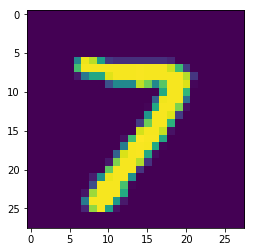

Etykieta: 7


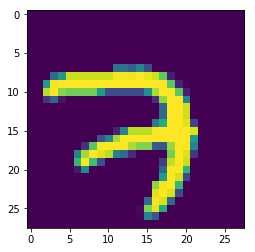

Etykieta: 6


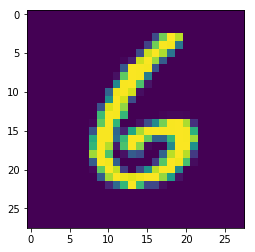

Etykieta: 8


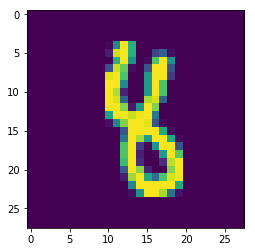

Etykieta: 0


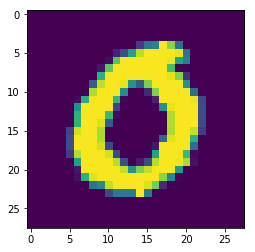

Etykieta: 6


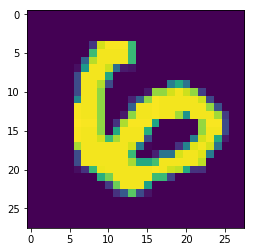

In [87]:
for i in range(1000,10000,1000):
    print("Etykieta:",y_train[i])
    plt.imshow(x_train.reshape((x_train.shape[0], 28, 28,))[i])
    plt.show()

## Wyrzucenie cyfr 0,1 oraz podział na liczby pierwsze
#### Zero oznacza liczbę złożoną a 1 liczbę pierwszą

In [88]:
def is_prime(n):
    if n == 2:
        return True
    if n % 2 == 0: 
        return False
    return all(n % i for i in range(3, int(math.sqrt(n)) + 1, 2))

def remove(digit, x, y):
    idx = (y != digit).nonzero()
    return x[idx], y[idx]

In [89]:
# Sprawdzenie 
for i in range(1,len(y_train),1000):
    print(y_train[i], is_prime(y_train[i]))

0 False
7 True
8 False
0 False
3 True
3 True
0 False
7 True
6 False
7 True
8 False
9 False
4 False
1 True
1 True
1 True
2 True
6 False
3 True
5 True
9 False
3 True
8 False
2 True
5 True
4 False
7 True
4 False
6 False
9 False
7 True
1 True
5 True
5 True
8 False
1 True
2 True
7 True
7 True
8 False
7 True
5 True
2 True
9 False
9 False
1 True
2 True
4 False
7 True
4 False
8 False
2 True
2 True
1 True
3 True
2 True
8 False
8 False
3 True
3 True


In [90]:
# Usuwam 0 i 1
x_train, y_train = remove(0, x_train, y_train)

In [91]:
x_train, y_train = remove(1, x_train, y_train)

In [92]:
x_test, y_test = remove(0, x_test, y_test)

In [93]:
x_test, y_test = remove(1, x_test, y_test)

In [94]:
# Sprawdzenie
for i in range(1,len(y_train),1000):
    print(y_train[i], is_prime(y_train[i]))

4 False
4 False
9 False
9 False
7 True
9 False
2 True
4 False
7 True
2 True
8 False
8 False
8 False
4 False
9 False
4 False
6 False
6 False
7 True
3 True
9 False
4 False
5 True
7 True
7 True
2 True
2 True
9 False
8 False
6 False
5 True
6 False
3 True
8 False
3 True
3 True
3 True
5 True
7 True
7 True
3 True
5 True
4 False
7 True
5 True
4 False
8 False
8 False


In [95]:
print('Wymiar x_train:', x_train.shape)
print('Wymiar x_test:', x_test.shape)
print('Liczba etykiet y_train:', y_train.shape)
print('Liczba etykiet y_test:', y_test.shape)

Wymiar x_train: (47335, 784)
Wymiar x_test: (7885, 784)
Liczba etykiet y_train: (47335,)
Liczba etykiet y_test: (7885,)


In [96]:
# Gdy liczba jest pierwsza to ma wartosc 1 a gdy zlozona to wartosc 0
for i in range (len(y_train)):
    if is_prime(y_train[i]) is True:
        y_train[i]=1
    else: y_train[i]=0            

for i in range (len(y_test)):
    if is_prime(y_test[i]) is True:
        y_test[i]=1
    else: y_test[i]=0    

In [97]:
# Sprawdzenie zbioru etykiet treningowego
for i in range(1,len(y_train),1000):
    print(y_train[i], is_prime(y_train[i]))

0 False
0 False
0 False
0 False
1 True
0 False
1 True
0 False
1 True
1 True
0 False
0 False
0 False
0 False
0 False
0 False
0 False
0 False
1 True
1 True
0 False
0 False
1 True
1 True
1 True
1 True
1 True
0 False
0 False
0 False
1 True
0 False
1 True
0 False
1 True
1 True
1 True
1 True
1 True
1 True
1 True
1 True
0 False
1 True
1 True
0 False
0 False
0 False


In [98]:
# Sprawdzenie zbioru etykiet testowego
for i in range(1,len(y_test),1000):
    print(y_test[i], is_prime(y_test[i]))

1 True
1 True
0 False
1 True
0 False
1 True
1 True
1 True


## Model regresji logistycznej

In [105]:
class LogisticRegression:

    def __init__(self, alfa, num_iter, beta):
        self.alfa = alfa
        self.num_iter = num_iter
        self.weights = None
        self.bias = None
        self.beta=beta
    
    def fit(self, X, y):
        num_samples, num_features = X.shape
        # Początkowe parametry
        self.weights = np.zeros(num_features)
        self.bias = 0
        vdw=0
        vdb=0
        # SGD
        for epoch in range(self.num_iter):
            # 50 iteracji dla jednej "epoki"
            for i in range(50):
                model = np.dot(X, self.weights) + self.bias
                # funkcja sigmoid
                y_predicted = self._sigmoid(model)
                # obliczanie gradientow
                dw = (2 / num_samples) * np.dot(X.T, (y_predicted - y))
                db = (2 / num_samples) * np.sum(y_predicted - y)
                
                # aktualizacja parameterow
                self.weights -= self.alfa * dw
                self.bias -= self.alfa * db
               
            print(epoch)

        
    def predict(self, X):
        model = np.dot(X, self.weights) + self.bias
        y_predicted = self._sigmoid(model)
        return np.array(y_predicted)

    def _sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

## Zastosowanie modelu do danych

In [106]:
reg=LogisticRegression(alfa=0.1, num_iter=100, beta=0.9)

In [107]:
reg.fit(x_train,y_train)

C:\Users\Jarek\Anaconda3\lib\site-packages\ipykernel_launcher.py:42: RuntimeWarning: overflow encountered in exp


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


In [108]:
predictions=reg.predict(x_test)

C:\Users\Jarek\Anaconda3\lib\site-packages\ipykernel_launcher.py:42: RuntimeWarning: overflow encountered in exp


## Dopasowanie

In [109]:
def accuracy(y_true,y_pred):
    accuracy=np.sum(y_true == y_pred)/len(y_true)
    return accuracy

In [110]:
print('Dopasowanie modelu:',accuracy(y_test,predictions))

Dopasowanie modelu: 0.9019657577679138


In [111]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import average_precision_score
from sklearn.metrics import recall_score

In [112]:
average_precision_score(y_test,predictions)

0.8952777190070956

In [114]:
predictions=np.asarray(predictions).astype(np.int32)
recall_score(y_test,predictions)

0.8770822816759213

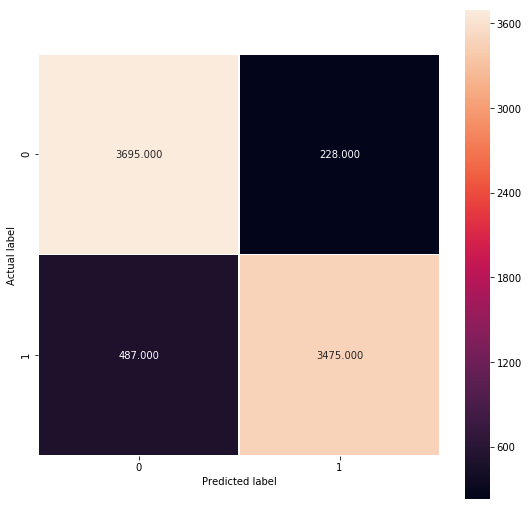

In [115]:
cm = confusion_matrix(y_test, predictions)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True);
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

## Podgląd, które cyfry zostały źle sklasyfikowane

In [116]:
index = 0
misclassifiedIndexes = []
for label, predict in zip(y_test, predictions):
    if label != predict: 
        misclassifiedIndexes.append(index)
    index +=1

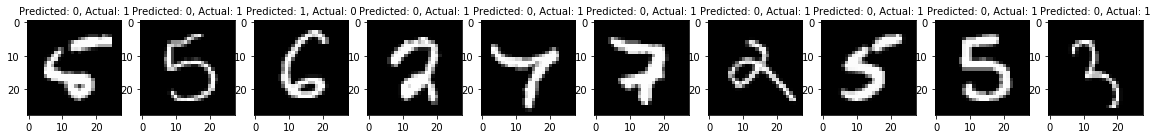

In [117]:
plt.figure(figsize=(20,4))
for plotIndex, badIndex in enumerate(misclassifiedIndexes[0:10]):
    plt.subplot(1, 10, plotIndex + 1)
    plt.imshow(np.reshape(x_test[badIndex], (28,28)), cmap=plt.cm.gray)
    plt.title('Predicted: {}, Actual: {}'.format(predictions[badIndex], y_test[badIndex]), fontsize =10 )

Można zauważyć, że zle sklasyfikowane zostaly cyfry o strukturze przypominajacej inną cyfrę. W modelu parametr beta został dobrany na poziomie 0.9, learning rate na poziomie 0.1 oraz liczba iteracji modelu rowna 2000.